In [72]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

import numpy as np
import torch
from baselines import *
from reader import RoutinesDataset, get_cooccurence_frequency
from encoders import TimeEncodingOptions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
time_options = TimeEncodingOptions(None)
data = RoutinesDataset(data_path=('../data/differentBreakfasts0202/routines_train.json', '../data/differentBreakfasts0202/routines_test.json'), 
                        classes_path='../data/differentBreakfasts0202/classes.json', 
                        time_encoder=time_options('external'), 
                        dt=10,
                        test_perc=0.1, 
                        batch_size=10,
                        only_seen_edges = False)

cooccurence_freq = get_cooccurence_frequency(data)

50  routines and  179  examples in train split.
5  routines and  16  examples in test split.


['dining_room', 'knifeblock', 'mat', 'table', 'cupboard', 'kitchen_counter', 'sink', 'kitchen_counter', 'coffe_maker', 'stove', 'fridge', 'bowl', 'chef_knife', 'coffee_filter', 'food_bread', 'food_cereal', 'food_egg', 'fork', 'ground_coffee', 'milk', 'mug', 'plate', 'sauce_pan', 'spoon']


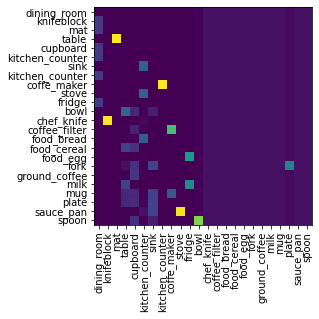

In [74]:
import matplotlib.pyplot as plt
print(data.node_classes)

def plot_matrix(matrix, ax=None, set_yticks=True):
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(matrix.numpy())

    _ = ax.set_xticks(np.arange(len(data.node_classes))) 
    _ = ax.set_xticklabels(data.node_classes, rotation = 90)

    if set_yticks:
        _ = ax.set_yticks(np.arange(len(data.node_classes))) 
        _ = ax.set_yticklabels(data.node_classes)

plot_matrix(cooccurence_freq)

In [75]:
def step_and_plot_results(baseline, routine = None):
    if routine is None:
        routine = list(data.test_routines)[0][0][0]
    data_in = data.test_routines.collate_fn([routine])
    out = baseline.step(data_in)
    idx = out.argmax(-1)
    out_thresh = torch.nn.functional.one_hot(idx, num_classes=data_in['edges'].size()[-1])
    fig, axs = plt.subplots(1,3)
    fig.set_size_inches(18.5, 10.5)
    plot_matrix(data_in['edges'].squeeze(), axs[0])
    plot_matrix(out.squeeze(), axs[1], set_yticks = False)
    plot_matrix(out_thresh.squeeze(), axs[2], set_yticks = False)

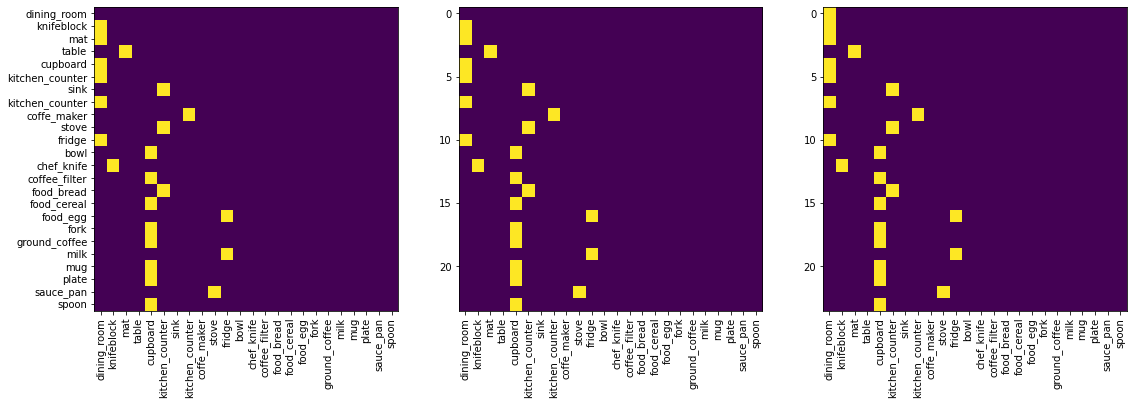

In [76]:
s = LastSeen()
step_and_plot_results(s)



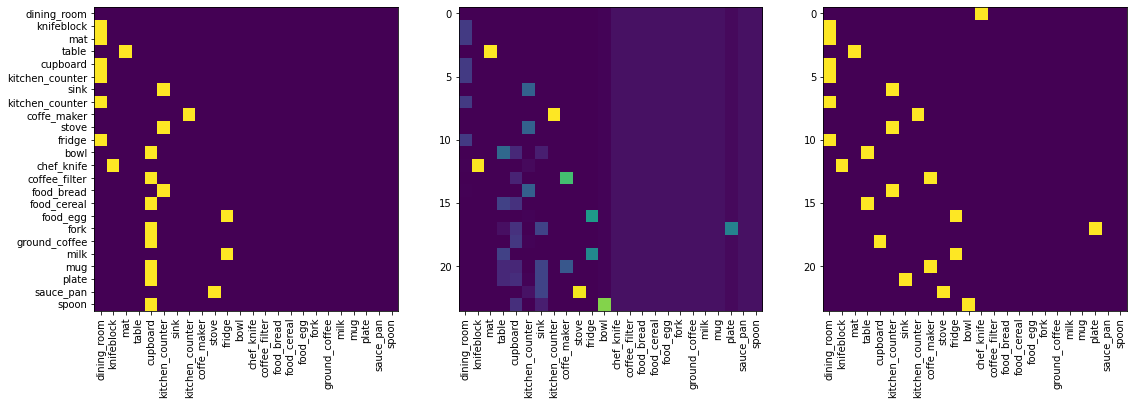

In [77]:
s = StaticSemantic(cooccurence_freq)
step_and_plot_results(s)


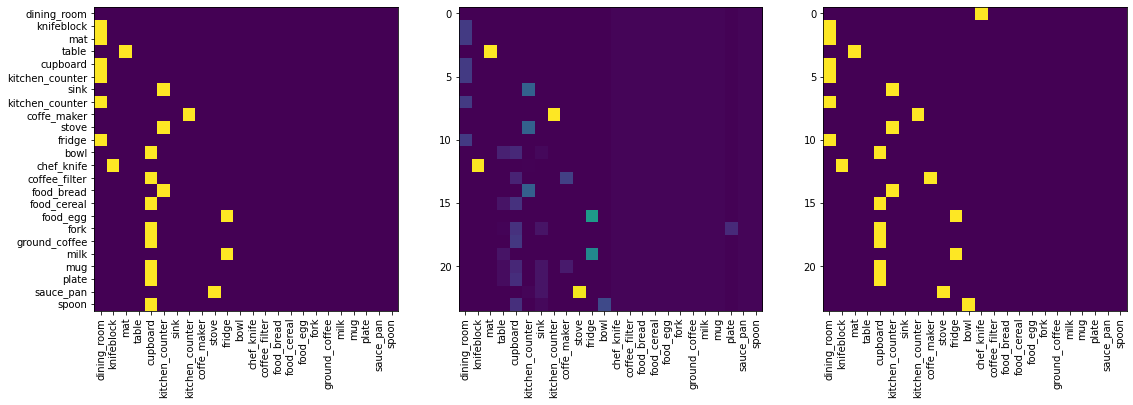

In [93]:
s = LastSeenAndStaticSemantic(cooccurence_freq, prob_change = 0.9)
step_and_plot_results(s)


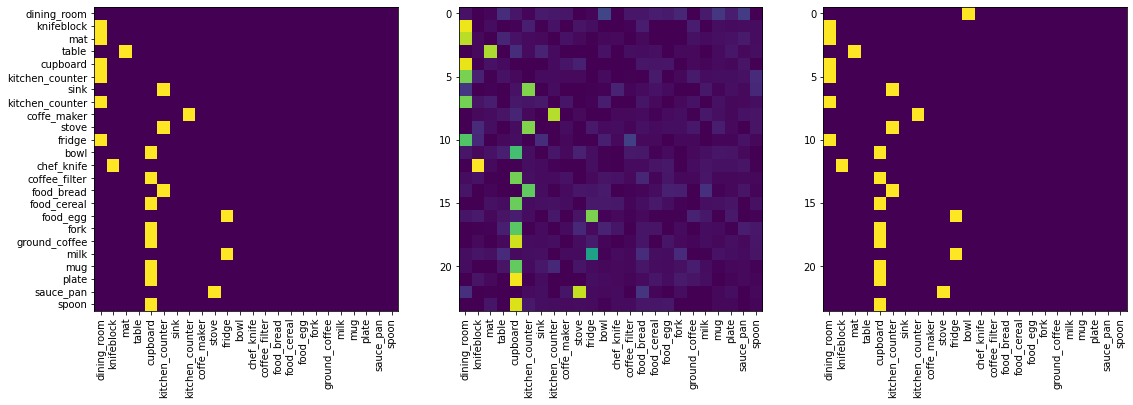

In [87]:
s = Slim(cooccurence_freq, num_particles=100, noise=0.5)
step_and_plot_results(s)
